In [1]:
import pandas as pd

df = pd.read_csv("telco_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Nulls in TotalCharges:", df['TotalCharges'].isnull().sum())


Nulls in TotalCharges: 11


In [4]:
df = df[df['TotalCharges'].notnull()].copy()
df.shape


(7032, 21)

In [5]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in yes_no_cols:
    df[col] = df[col].replace({'Yes':1, 'No':0})


C:\Users\chakr\AppData\Local\Temp\ipykernel_17560\461786449.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes':1, 'No':0})


In [6]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['customerID',
 'gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [7]:
cat_cols.remove('customerID')


In [8]:
cat_cols


['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [9]:
for col in cat_cols:
    df[col] = df[col].astype('category')


In [10]:
def tenure_group(x):
    if x <= 12: return "0-1 year"
    elif x <= 24: return "1-2 years"
    elif x <= 48: return "2-4 years"
    elif x <= 60: return "4-5 years"
    else: return "5+ years"

df['tenure_group'] = df['tenure'].apply(tenure_group)
df['tenure_group'] = df['tenure_group'].astype('category')


In [11]:
df['MonthlyChargeLevel'] = pd.qcut(df['MonthlyCharges'], 4, labels=['Low','Medium','High','Very High'])
df['MonthlyChargeLevel'] = df['MonthlyChargeLevel'].astype('category')


In [12]:
df.to_csv("telco_clean.csv", index=False)


In [13]:
df.shape

(7032, 23)

In [14]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [15]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn']


In [16]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4-5 years,tenure_group_5+ years,MonthlyChargeLevel_Medium,MonthlyChargeLevel_High,MonthlyChargeLevel_Very High
0,0,1,0,1,0,1,29.85,29.85,False,True,...,False,True,False,False,False,False,False,False,False,False
1,0,0,0,34,1,0,56.95,1889.50,True,False,...,False,False,True,False,True,False,False,True,False,False
2,0,0,0,2,1,1,53.85,108.15,True,False,...,False,False,True,False,False,False,False,True,False,False
3,0,0,0,45,0,0,42.30,1840.75,True,True,...,False,False,False,False,True,False,False,True,False,False
4,0,0,0,2,1,1,70.70,151.65,False,False,...,False,True,False,False,False,False,False,False,True,False


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
X_train.shape, X_test.shape


((5625, 37), (1407, 37))

In [19]:
y_train.value_counts(), y_test.value_counts()


(Churn
 0    4130
 1    1495
 Name: count, dtype: int64,
 Churn
 0    1033
 1     374
 Name: count, dtype: int64)

In [20]:
from sklearn.preprocessing import StandardScaler

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [21]:
X_train.shape

(5625, 37)

In [22]:
X_test.shape

(1407, 37)

In [23]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [24]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-2 years,tenure_group_2-4 years,tenure_group_4-5 years,tenure_group_5+ years,MonthlyChargeLevel_Medium,MonthlyChargeLevel_High,MonthlyChargeLevel_Very High
1413,0,1,1,1.321816,1,0,0.981556,1.659900,True,False,...,True,False,False,False,False,False,True,False,False,True
7003,0,0,0,-0.267410,0,0,-0.971546,-0.562252,True,True,...,False,True,False,False,True,False,False,True,False,False
3355,0,1,0,1.444064,1,0,0.837066,1.756104,False,False,...,True,False,False,False,False,False,True,False,False,True
4494,0,0,0,-1.204646,1,0,0.641092,-0.908326,True,False,...,False,True,False,False,False,False,False,False,True,False
3541,0,1,0,0.669826,0,0,-0.808787,-0.101561,False,True,...,False,False,False,False,False,True,False,True,False,False


In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

X_train_balanced.shape, y_train_balanced.value_counts()


((8260, 37),
 Churn
 0    4130
 1    4130
 Name: count, dtype: int64)

In [26]:
X_train_balanced.to_csv("X_train_balanced.csv", index=False)
y_train_balanced.to_csv("y_train_balanced.csv", index=False)


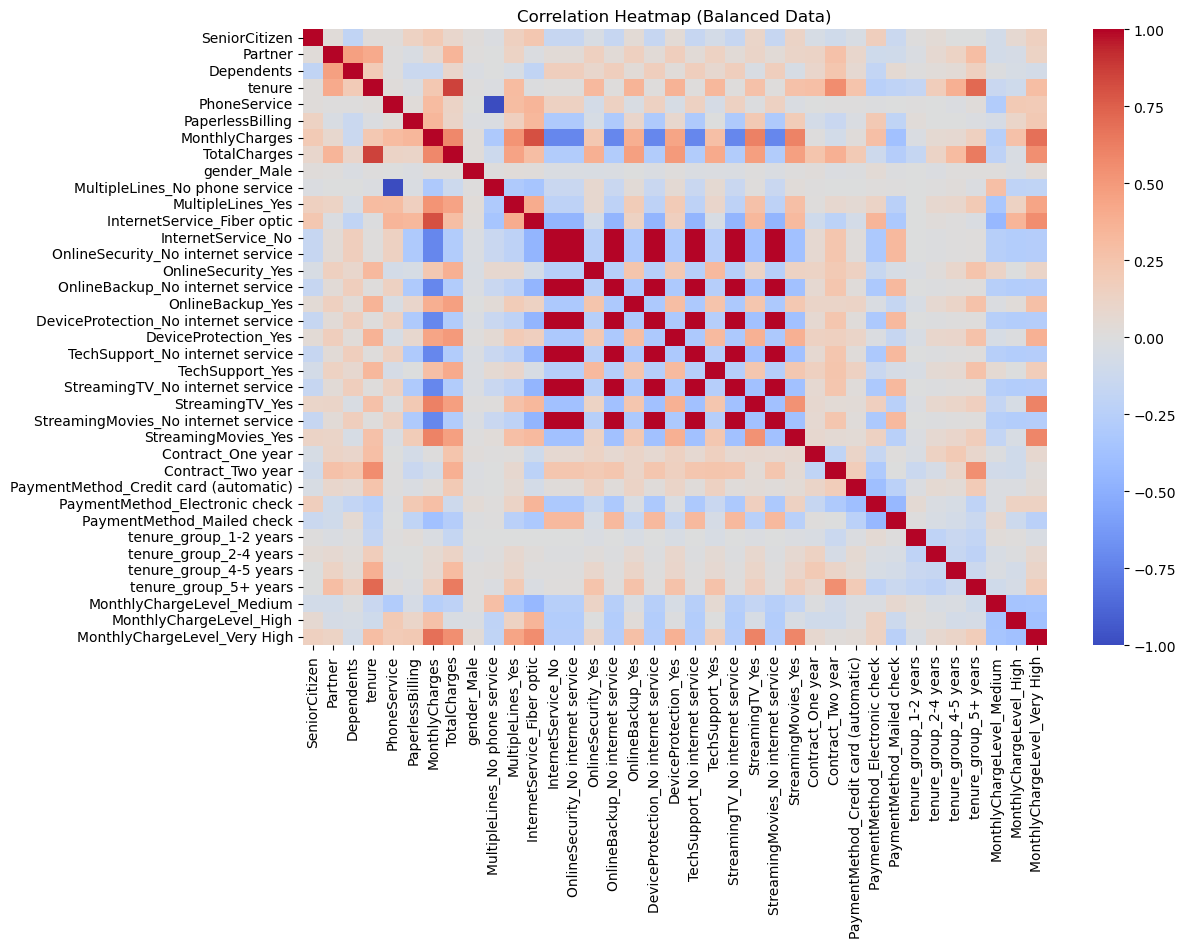

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(X_train_balanced.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Balanced Data)")
plt.show()


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score


In [29]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [30]:
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_balanced, y_train_balanced)

print("Logistic Regression Results:")
evaluate_model(log_model, X_test, y_test)


Logistic Regression Results:

Accuracy: 0.7377398720682303
F1 Score: 0.5849268841394826
ROC-AUC: 0.8135783839189112

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1033
           1       0.50      0.70      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407


Confusion Matrix:
[[778 255]
 [114 260]]


In [31]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

print(" Random Forest Results:")
evaluate_model(rf_model, X_test, y_test)


 Random Forest Results:

Accuracy: 0.7633262260127932
F1 Score: 0.588380716934487
ROC-AUC: 0.8104257367824362

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407


Confusion Matrix:
[[836 197]
 [136 238]]


In [32]:
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb_model.fit(X_train_balanced, y_train_balanced)

print(" XGBoost Results:")
evaluate_model(xgb_model, X_test, y_test)


 XGBoost Results:

Accuracy: 0.757640369580668
F1 Score: 0.5866666666666667
ROC-AUC: 0.8104218542120711

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.76      1407


Confusion Matrix:
[[824 209]
 [132 242]]


In [33]:
lgb_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=50
)

lgb_model.fit(X_train_balanced, y_train_balanced)

print(" LightGBM Results:")
evaluate_model(lgb_model, X_test, y_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 LightGBM Results:

Accuracy: 0.7540867093105899
F1 Score: 0.5664160401002506
ROC-AUC: 0.8082527915680925

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.53      0.60      0.57       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       

In [34]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0
)

cat_model.fit(X_train_balanced, y_train_balanced)

print(" CatBoost Results:")
evaluate_model(cat_model, X_test, y_test)


 CatBoost Results:

Accuracy: 0.7569296375266524
F1 Score: 0.5918854415274463
ROC-AUC: 0.8188884459882695

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.53      0.66      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407


Confusion Matrix:
[[817 216]
 [126 248]]


In [35]:
pip install scikit-optimize shap joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, recall_score, classification_report, confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation helper
def print_eval(y_true, y_pred, y_proba=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    if y_proba is not None:
        try:
            print("ROC-AUC:", roc_auc_score(y_true, y_proba[:,1]))
        except:
            print("ROC-AUC: could not compute (check y_proba shape)")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [37]:
# base estimator
cb = CatBoostClassifier(
    verbose=0,
    random_state=42,
    thread_count=-1,
    loss_function='Logloss',
    eval_metric='AUC'
)

# parameter distributions for RandomizedSearch
param_dist = {
    'iterations': [200, 400, 600, 800],
    'depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 50, 100],
    'random_strength': [0, 1, 5, 10],
    'bagging_temperature': [0, 0.2, 0.5, 1.0]
}

# use StratifiedKFold to keep label distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=cb,
    param_distributions=param_dist,
    n_iter=30,                # number of sampled parameter settings
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42,
    return_train_score=True
)

# Fit search (this may be compute heavy depending on your machine)
rs.fit(X_train_balanced, y_train_balanced)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000022306D53750>,
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.2, 0.5,
                                                                1.0],
                                        'border_count': [32, 50, 100],
                                        'depth': [4, 5, 6, 7, 8],
                                        'iterations': [200, 400, 600, 800],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.07, 0.1],
                                        'random_strength': [0, 1, 5, 10]},
                   random_state=42, return_train_score=True, scoring='f1',
                   verbose=2)

In [38]:
print("Best params:", rs.best_params_)
print("Best CV F1:", rs.best_score_)


Best params: {'random_strength': 0, 'learning_rate': 0.03, 'l2_leaf_reg': 7, 'iterations': 800, 'depth': 8, 'border_count': 100, 'bagging_temperature': 0.2}
Best CV F1: 0.8482623339459449


In [39]:
best_params = rs.best_params_
best_cb = CatBoostClassifier(**best_params, verbose=0, random_state=42, thread_count=-1)
best_cb.fit(X_train_balanced, y_train_balanced, eval_set=(X_test, y_test), use_best_model=True)


In [40]:
y_pred = best_cb.predict(X_test)
y_proba = best_cb.predict_proba(X_test)

print_eval(y_test, y_pred, y_proba)


Accuracy: 0.7583511016346838
F1 Score: 0.6037296037296037
Recall: 0.6925133689839572
ROC-AUC: 0.8283360338767205

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1033
           1       0.54      0.69      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.74      0.71      1407
weighted avg       0.78      0.76      0.77      1407


Confusion Matrix:
 [[808 225]
 [115 259]]


In [41]:
joblib.dump(best_cb, "catboost_churn_best.pkl")
print("Saved model to catboost_churn_best.pkl")


Saved model to catboost_churn_best.pkl


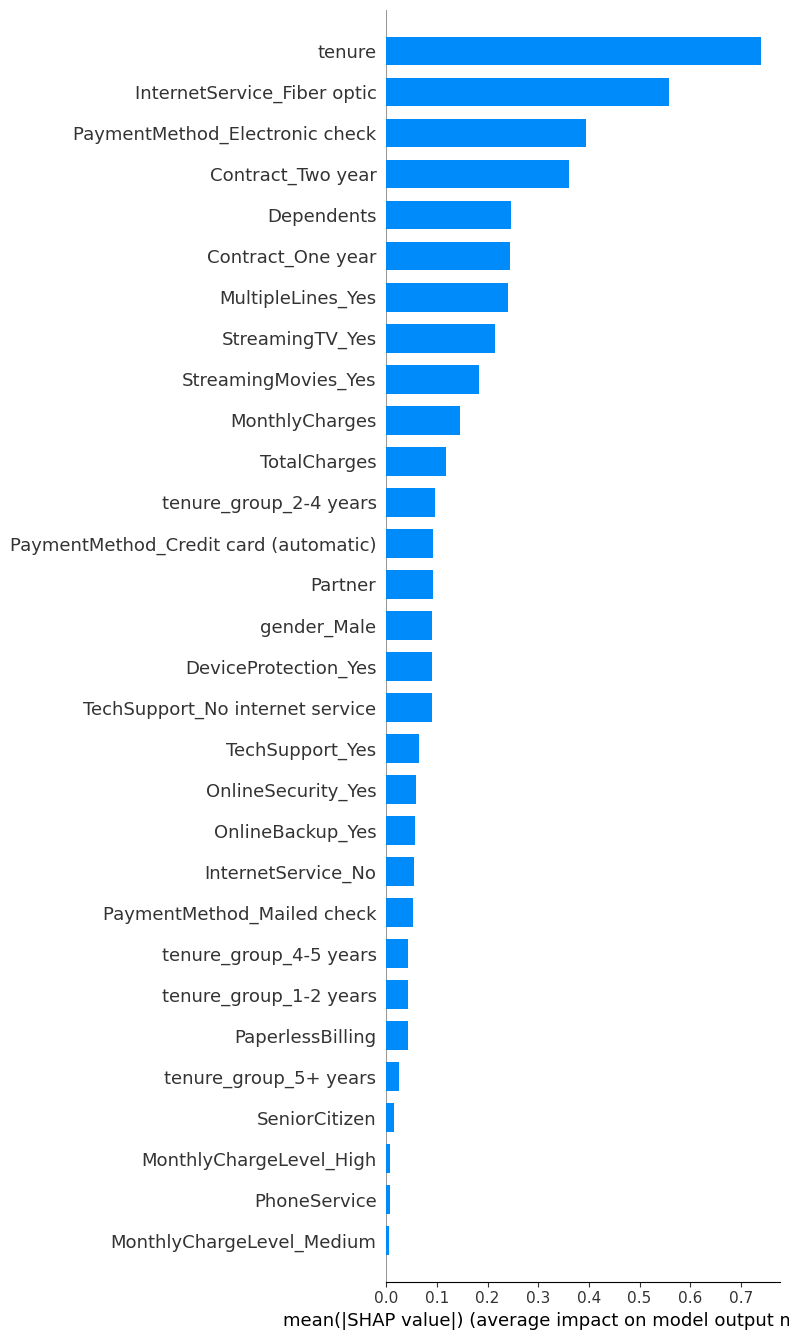

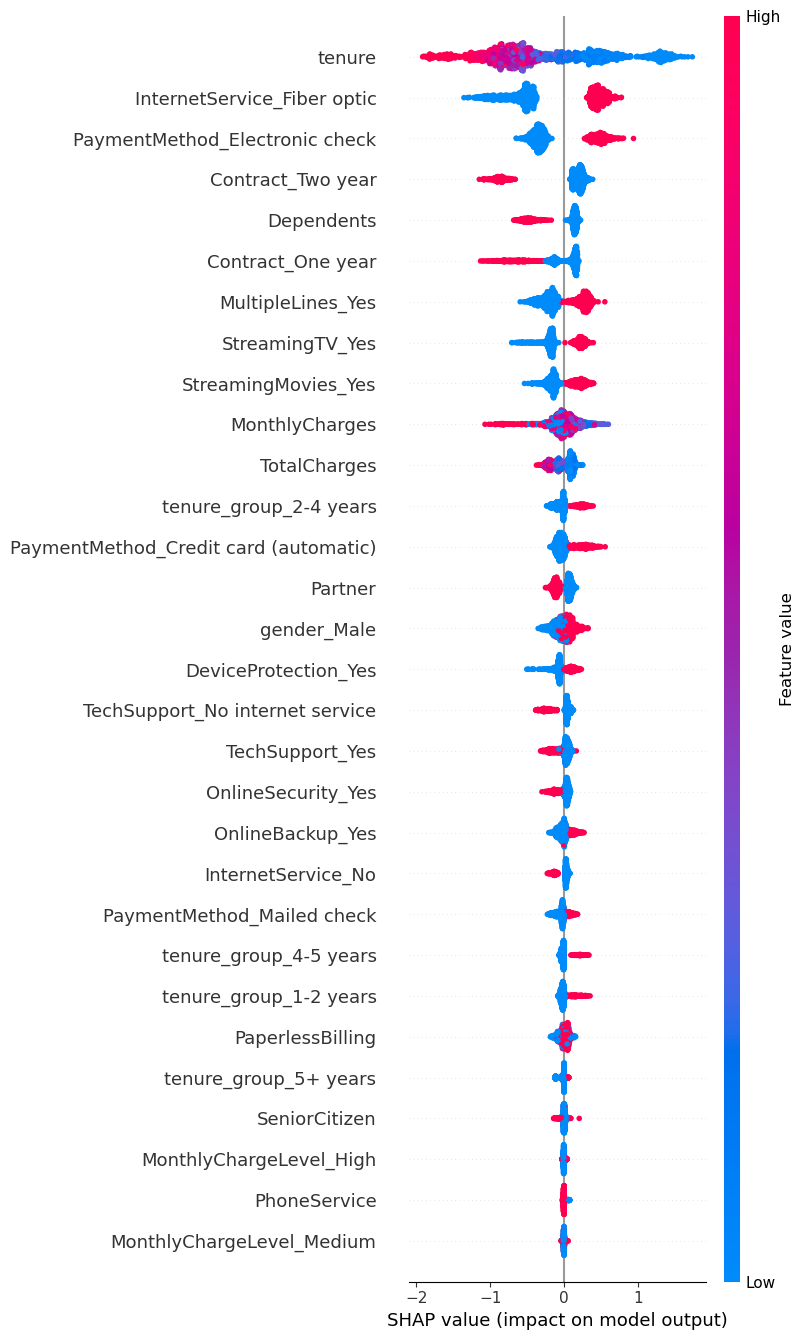

,feature,mean_abs_shap
3,tenure,0.740236
11,InternetService_Fiber optic,0.558991
28,PaymentMethod_Electronic check,0.394322
26,Contract_Two year,0.360450
2,Dependents,0.246228
25,Contract_One year,0.245073
10,MultipleLines_Yes,0.239752
22,StreamingTV_Yes,0.214301
24,StreamingMovies_Yes,0.183982
6,MonthlyCharges,0.146018


In [43]:
# create TreeExplainer for CatBoost
explainer = shap.TreeExplainer(best_cb)
# compute SHAP values for test set (may use a sample if full test is large)
X_shap = X_test  # or X_test.sample(1000, random_state=42) if big
shap_values = explainer.shap_values(X_shap)  # for binary, shap_values is array-like [class0, class1] or just class1 depending on SHAP version

# For CatBoost / binary classification shap.TreeExplainer returns list-like [shap_class0, shap_class1]
# We typically visualize shap_values for the positive class (index 1)
# Make sure you find the right format:
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_vals_pos = shap_values[1]
else:
    shap_vals_pos = shap_values  # if it's already a 2D array

# SHAP summary plot (global importance)
shap.summary_plot(shap_vals_pos, X_shap, plot_type="bar", max_display=30)

# Detailed summary (beeswarm)
shap.summary_plot(shap_vals_pos, X_shap, max_display=30)

# Feature importance via SHAP values (mean abs)
shap_importance = pd.DataFrame({
    'feature': X_shap.columns,
    'mean_abs_shap': np.abs(shap_vals_pos).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

display(shap_importance.head(20))


In [44]:
# pick an index from X_shap
idx = 10  # choose any valid index
row = X_shap.iloc[[idx]]
pred = best_cb.predict_proba(row)[0,1]
print("Predicted probability of churn:", pred)

# force plot (visual)
shap.initjs()
shap.force_plot(explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value,
                shap_vals_pos[idx,:], row)
# If above fails, use:
# shap.plots.force(explainer.expected_value, shap_vals_pos[idx], row)


Predicted probability of churn: 0.7701690576323164


In [45]:
shap_df = pd.DataFrame(shap_vals_pos, columns=X_shap.columns)
shap_df.to_csv("shap_values_test_posclass.csv", index=False)
shap_importance.to_csv("shap_feature_importance.csv", index=False)
print("Saved SHAP artifacts.")


Saved SHAP artifacts.
